## Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Face Detection using Haar Cascade Classifier (haarcascade_frontalface_default.xml)

In [2]:
face_classifier = cv2.CascadeClassifier(r'.\Haarcascades\haarcascade_frontalface_default.xml')

In [3]:
face_classifier

< cv2.CascadeClassifier 0000014FFE9B4D70>

In [4]:
image = cv2.imread('modi.jpg')

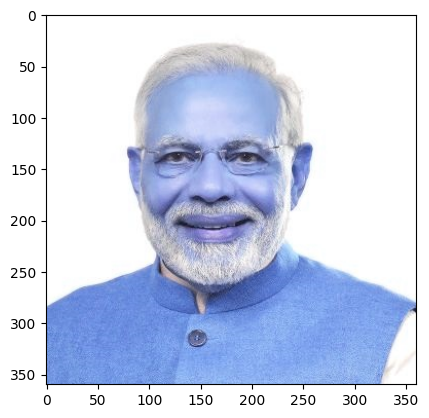

In [6]:
plt.imshow(image)

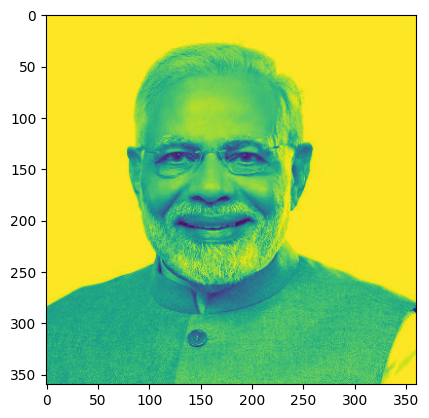

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

* img[:, :, ::-1] is numpy slicing, which means that we select all the elements on the first axis, all the elements on the seconds, and then the reverse of the elements on the third axis.

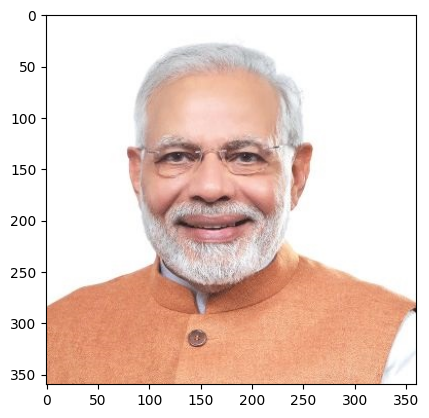

In [8]:
img2 = image[:,:,::-1]
plt.imshow(img2)

In [9]:
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

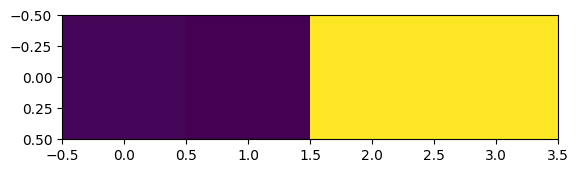

In [10]:
plt.imshow(faces)

In [15]:
if len(faces) == 0:
    print('No faces found')
else:
    print('faces found')

faces found


In [14]:
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)

In [16]:
face_classifier = cv2.CascadeClassifier(r'.\Haarcascades\haarcascade_frontalface_default.xml')
image = cv2.imread('modi.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print('No faces found')

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

## Combine face and eye detection

In [7]:
face_classifier = cv2.CascadeClassifier(r'.\Haarcascades\haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(r'.\Haarcascades\haarcascade_eye.xml')
 
img = cv2.imread('modi.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('img',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        cv2.imshow('img',img)
        cv2.waitKey(0)
    
cv2.destroyAllWindows()

## Live face & eye detection

In [5]:
# Load Haar cascades
face_classifier = cv2.CascadeClassifier(r'.\Haarcascades\haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(r'.\Haarcascades\haarcascade_eye.xml')

def face_detector(img, size=0.5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if len(faces) == 0:
        return img
    
    for (x, y, w, h) in faces:
        x = max(x - 20, 0)  # Smaller expansion for steadier visuals
        w = w + 20
        y = max(y - 20, 0)
        h = h + 20
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 2)
    
    return img

# Start video capture
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame. Exiting...")
            break
        
        # Display video feed with detection
        cv2.imshow('Face and Eye Detector', face_detector(frame))
        
        # Add a delay to stabilize the window refresh rate
        time.sleep(0.03)  # Adjust delay (in seconds) as needed
        
        # Exit on pressing 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    cap.release()
    cv2.destroyAllWindows()